# Gauss-Newton for XRD

a simple example

In [1]:
from XRDXRFutils import GaussNewton,DataXRD,SpectraXRD,DatabaseXRD,PhaseList,PhaseSearch

from matplotlib.pyplot import xlim,ylim,xlabel,ylabel,legend,plot,fill_between,imshow,subplots,sca,figure
from numpy import prod,array,minimum,maximum,log,zeros,trapz,where
from multiprocessing import Pool

### loading data

In [2]:
#path_xrd = '/home/zdenek/Projects/pyMaXRDXRF/M491/ProfiloXRD/'
path_xrd = '../../dati/Oslo/Profilo/XRD/'

#path_database = '/home/zdenek/Projects/XRDXRFutils/Database'
path_database = '../../dati/Database/'

#spectrum = SpectraXRD().from_file(path_xrd + 'Frame2906.dat')
spectrum = SpectraXRD().from_file(path_xrd + 'Frame1599.dat')
#spectrum.calibrate_from_file(path_xrd + 'calibration.ini')
spectrum.calibrate_from_parameters([-1180, 1970, 51])

database = DatabaseXRD().read_cifs(path_database)

lazurite = database['Lazurite'][0]
hydrocerussite = database['Hydrocerussite'][0]
cinnabar = database['Cinnabar'][0]
barite = database['Barite'][0]
spinel = database['Spinel'][0]
calcite = database['Calcite'][0]
hematite = database['Hematite'][0]

phases = PhaseList([PhaseList([hydrocerussite, cinnabar]), hydrocerussite, lazurite, cinnabar, barite, spinel, calcite])

[-1172.76520678  1940.30243234    51.        ]


Text(0, 0.5, 'relative intensity')

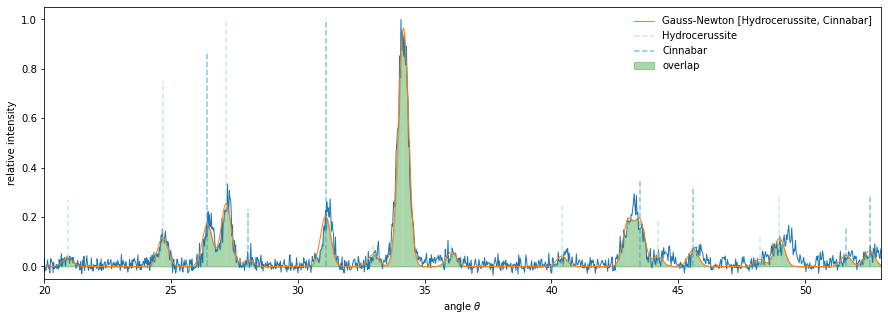

In [3]:
%matplotlib inline

figure(figsize=(15,5))

phase_search = PhaseSearch(phases, spectrum).search()
phase_search.fit_cycle(max_steps = 100, gamma = True)

g = phase_search.select()
print(g.opt)

g.plot_spectra(lw = 1)
g.plot('-', label = f'Gauss-Newton {g.label}', lw=1)
g.phase.plot('GnBu', alpha=0.66)

fill_between(g.theta.squeeze(), g.overlap(), color = 'g', alpha = 0.33, label = 'overlap')

legend(frameon = False)
ylim(-0.05, 1.05)
xlim(20, 53)
xlabel(r'angle $\theta$')
ylabel(r'relative intensity')

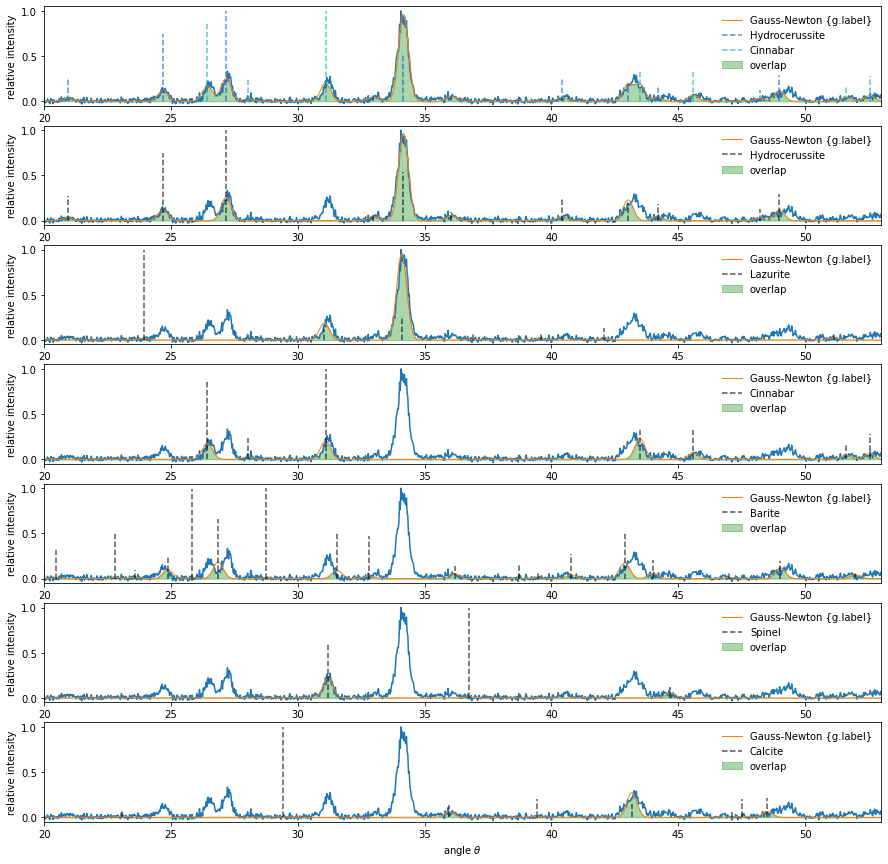

In [5]:
%matplotlib inline

fig, ax = subplots(len(phase_search), 1, figsize=(15, 15))

for i,g in enumerate(phase_search):
        
    sca(ax[i])
    g.plot_spectra()
    g.plot('-', label = 'Gauss-Newton {g.label}', lw=1)
    g.phase.plot(alpha = 0.66)
    
    
    fill_between(g.theta.squeeze(), g.overlap(), color = 'g', alpha = 0.33, label = 'overlap')

    legend(frameon = False)
    ylim(-0.05, 1.05)
    xlim(20, 53)
    xlabel(r'angle $\theta$')
    ylabel(r'relative intensity')